In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# **Preprocessing and Exploratory Data Analysis**

## Preprocessing

Instead of preprocessing all csv files together, I will be chhecking all csv files one-by-one and see what preprocessing I need to do, I will also see what other features I can extract.


In [2]:
pd.read_csv('input/sales_train.csv')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


This file has item_id, we can add another feature item_category by merging information from the items.csv

In [5]:
items = pd.read_csv('input/items.csv')
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


Let's have a look at item_categories.csv

In [4]:
pd.read_csv('input/item_categories.csv')

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


Categories like PS2, PS3 can be futher merged into same category - PS. We can expect to find more such relations, for which I translated this Russian file to English. After which it seems that if we split category name into two different categories, viz. main category and sub cateogry, it might be more helpful. We would try doing so. But let's check remaining shops.csv before preprocessing everything.

In [6]:
pd.read_csv('input/shops.csv')

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


After talking with some people who know Russian (internet is very useful thing), I figured out that most of shop names in fact are in format : CityName TP/TPK/ETC ShopOrMallName. TP/TPK/TU means Shopping complex, Shopping and Entertainment complex and Shopping center respectively. So we can add another columns, city name, shop category (TP/TPK/TU/Others) and vanila shop name. 

Now, we have seen all files and can start prepreocessing, I will start from shops.csv and then see what we can do for item_categories.csv, then we will merge data from all 4 files into a single dataframe.

In [7]:
import string
shops = pd.read_csv('input/shops.csv', index_col='shop_id')
shops["shop_name"] = shops["shop_name"].str.replace('[^\w\s]','')  # Remove punctuations

## Uncomment following line to see how we can create city column
## shops['city'] = shops['shop_name'].apply(lambda shop : shop.split()[0])
## Since we are creating more than one columns, we will create all of them together.

shops[["shop_city", "shop_category", "shop_name"]] = shops["shop_name"].str.split(n=2, expand=True)
shops.drop('shop_name', axis=1, inplace=True)
shops.head()

,shop_city,shop_category
shop_id,,
0,Якутск,Орджоникидзе
1,Якутск,ТЦ
2,Адыгея,ТЦ
3,Балашиха,ТРК
4,Волжский,ТЦ


Let's explore this data more.

In [21]:
print('--Cities--')
print(shops['shop_city'].value_counts())
print('--Categories--')
print(shops['shop_category'].value_counts())


--Cities--
Москва             13
Якутск              4
Воронеж             3
РостовНаДону        3
Тюмень              3
СПб                 2
Казань              2
ННовгород           2
Уфа                 2
Красноярск          2
Самара              2
Новосибирск         2
Жуковский           2
Коломна             1
Волжский            1
Омск                1
Выездная            1
Вологда             1
Балашиха            1
Цифровой            1
Чехов               1
Мытищи              1
Химки               1
Ярославль           1
Томск               1
Сургут              1
Адыгея              1
Интернетмагазин     1
Калуга              1
Курск               1
Сергиев             1
Name: shop_city, dtype: int64
--Categories--
ТЦ              27
ТРЦ             11
ТК               5
ТРК              5
Орджоникидзе     2
ул               2
Торговля         1
ЧС               1
Магазин          1
Посад            1
Плехановская     1
МТРЦ             1
Распродажа       1
склад          

Upon translating above into English, I found that some city names and some categories are incorrect, however such entries are less, so I kept things as they are.

In [8]:
item_categories = pd.read_csv('input/item_categories.csv', index_col='item_category_id')
item_categories["item_category_name"] = item_categories["item_category_name"].str.replace('[^\w\s-]','')  # Remove punctuations

item_categories[["item_main_category_name", "item_sub_category_name"]] = item_categories["item_category_name"].str.split(pat='-', n=1, expand=True)
item_categories.drop('item_category_name', axis=1, inplace=True)
item_categories.head()

item_categories.head()

,item_main_category_name,item_sub_category_name
item_category_id,,
0,PC,ГарнитурыНаушники
1,Аксессуары,PS2
2,Аксессуары,PS3
3,Аксессуары,PS4
4,Аксессуары,PSP


In [23]:
item_categories['item_sub_category_name'].value_counts()

 Цифра                          4
 PS4                            3
 XBOX 360                       3
 PSP                            3
 PS3                            3
 XBOX ONE                       3
 PSVita                         3
 PS2                            3
 Билеты                         1
 Настольные игры                1
 CD локального производства     1
 1СПредприятие 8                1
 Настольные игры компактные     1
 Прочие                         1
 Windows Цифра                  1
 Аудиокниги 1С                  1
 Коллекционные издания          1
 Аудиокниги                     1
 Компьютерная литература        1
 Сумки Альбомы Коврики дмыши    1
 Live                           1
 Аксессуары для игр             1
 Blu-Ray 4K                     1
 Дополнительные издания         1
 CD фирменного производства     1
 Для дома и офиса               1
 Обучающие                      1
 Винил                          1
 Артбуки энциклопедии           1
 Атрибутика   

For now, I will not extract furthur information from item categories. Now I will prepare training data, for which we will use sales_train.csv and then join appropriate columns, so that we will have all required features in a single dataframe.

In [9]:
sales_train = pd.read_csv('input/sales_train.csv')
sales_train.head()
sales_train['date'] = pd.to_datetime(sales_train['date'],format='%d.%m.%Y')
sales_train['day'], sales_train['month'], sales_train['year'], sales_train['weekday'] = sales_train['date'].dt.day, sales_train['date'].dt.month, sales_train['date'].dt.year, sales_train['date'].dt.weekday
# Monday is 0
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013,2
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013,3
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013,5
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013,6
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013,1


We do have some outliers, but detecting them would be easy once we've merged things, so I'm not removing them right now.

In [48]:
# Run this code cell only once! On error, run previous cell again.
sales_train = sales_train.merge(items.drop('item_name', axis=1), on='item_id')
sales_train = sales_train.merge(item_categories, on='item_category_id')
sales_train = sales_train.merge(shops, on='shop_id')
sales_train.head(25)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday,item_category_id,item_main_category_name,item_sub_category_name,shop_city,shop_category
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013,2,37,Кино,Blu-Ray,Ярославль,ТЦ
1,2013-04-26,3,59,944,150.00,1.0,26,4,2013,4,37,Кино,Blu-Ray,Ярославль,ТЦ
2,2013-06-26,5,59,944,199.50,1.0,26,6,2013,2,37,Кино,Blu-Ray,Ярославль,ТЦ
3,2013-07-20,6,59,944,199.50,1.0,20,7,2013,5,37,Кино,Blu-Ray,Ярославль,ТЦ
4,2013-09-14,8,59,944,299.00,2.0,14,9,2013,5,37,Кино,Blu-Ray,Ярославль,ТЦ
5,2013-10-21,9,59,944,299.00,1.0,21,10,2013,0,37,Кино,Blu-Ray,Ярославль,ТЦ
6,2013-11-02,10,59,944,299.00,1.0,2,11,2013,5,37,Кино,Blu-Ray,Ярославль,ТЦ
7,2014-01-06,12,59,944,299.00,1.0,6,1,2014,0,37,Кино,Blu-Ray,Ярославль,ТЦ
8,2014-03-30,14,59,944,299.00,1.0,30,3,2014,6,37,Кино,Blu-Ray,Ярославль,ТЦ
9,2014-04-20,15,59,944,199.00,1.0,20,4,2014,6,37,Кино,Blu-Ray,Ярославль,ТЦ


## EDA

In [ ]:
sales_train['item_cnt_day'].plot()
sales_train[sales_train['item_cnt_day'] == sales_train['item_cnt_day'].max()]
sales_train.nlargest(50, 'item_cnt_day', keep='first')

date
2013-12-28   13343.0000
2014-12-30   13236.0000
2013-12-29   12863.0000
2013-12-30   12823.0000
2014-12-31   11394.0000
2014-12-27   10919.0000
2013-12-31   10514.0000
2014-12-28    9727.0000
2013-02-23    9456.0000
2014-10-04    8767.0000
2013-12-21    8704.0000
2014-12-29    8593.0000
2015-05-19    8483.0000
2014-02-22    8472.0000
2013-10-05    8425.0000
2014-12-20    8367.0000
2014-05-27    8256.0000
2013-01-02    8198.0000
2013-02-22    8009.0000
2013-12-27    7991.0000
2014-01-02    7932.0000
2013-12-22    7749.0000
2013-03-08    7582.0000
2013-01-03    7422.0000
2015-01-02    7408.0000
2013-03-16    7347.0000
2013-10-06    7270.0000
2013-11-29    7262.0000
2014-12-21    7243.0000
2013-03-23    7236.0000
2013-12-14    7228.0000
2015-04-14    7158.0000
2013-12-26    7112.0000
2014-10-05    7060.0000
2014-12-26    7040.0000
2013-09-17    6832.0000
2014-01-03    6812.0000
2013-02-09    6802.0000
2015-01-03    6779.0000
2013-03-07    6766.0000
2013-12-07    6753.0000
2013-09-21 

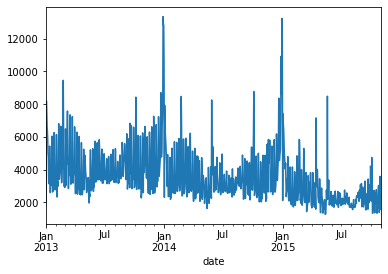

In [62]:
pd.options.display.float_format = '{:.4f}'.format  # Globally suppress sci format
print((sales_train.groupby('date').item_cnt_day).sum().nlargest(50, keep='first'))
(sales_train.groupby('date').item_cnt_day).sum().plot()

In [ ]:
sales_train.shape()

In [78]:
sales_train[sales_train['item_category_id'] == 1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday,item_category_id,item_main_category_name,item_sub_category_name,shop_city,shop_category
1379432,2013-02-20,1,0,5740,283.0000,1.0000,20,2,2013,2,1,Аксессуары,PS2,Якутск,Орджоникидзе
2253323,2013-01-10,0,45,5606,148.0000,1.0000,10,1,2013,3,1,Аксессуары,PS2,Самара,ТЦ
